Informática - 1º de Física
<br>
**Introducción a la Programación**
<br>
<p style="color:#808080"> <small><small>
28/1/2019
</small></small></p>

# Ejercicios resueltos

Los pasos a seguir para resolver un ejercicio de programación son los siguientes:

- **Lee detenidamente** el enunciado, tratando de entender perfectamente lo que se pide. En caso de duda, opta por la interpretación más simple. Las soluciones correctas suelen requerir muy pocas líneas de código.


- Expresa con tus propias palabras el objetivo a conseguir y explica brevemente cómo vas a estructurar la solución.


- Prepara dos o tres **casos de prueba** sencillos, cuyo resultado es conocido, y escribe el programa que los pone a prueba, suponiendo que ya estuviera escrita la solución.


- Finalmente, escribe el código de las funciones requeridas, incluyendo breves comentarios sobre la tarea que tratan de resolver. En principio busca una solución correcta aunque el método de resolución utilizado no te guste mucho.


- Comprueba que se obtiene el resultado esperado en los casos de prueba.


Si tienes tiempo:


- Si la solución te parece poco elegante o es muy  ineficiente intenta simplificarla.


- Comprueba que produce errores comprensibles cuando los datos de entrada son incorrectos.

A veces presentamos varias soluciones para explicar ciertos conceptos de programación, pero en los exámenes es suficiente con una.

## 1)

<span style="color:darkblue">Resuelve el sistema:</span>

$$ 
\begin{align*}
x + 2y + 5z + 4w&= 24\\
y-z  &= 1 \\
2x+2y &= 6 \\
-x+2y+3w &= 15
\end{align*}
$$


Simplemente hay que crear la matriz de coeficientes y el término independiente y aplicar la función `numpy.linalg.solve`.

In [16]:
import numpy as np

A = np.array([[1,2,5,4],
              [0,1,-1,0],
              [2,2,0,0],
              [-1,2,0,3]])

B = np.array([[24],
              [1],
              [6],
              [15]])

In [17]:
X = np.linalg.solve(A,B)
X

array([[  2.00000000e+00],
       [  1.00000000e+00],
       [ -7.10542736e-16],
       [  5.00000000e+00]])

Siempre es conveniente comprobar que la solución efectivamente resuelve el sistema.

In [18]:
A @ X

array([[ 24.],
       [  1.],
       [  6.],
       [ 15.]])

## 2)

 <span style="color:darkblue">Escribe una función para comprobar si todos los elementos de una lista son iguales.</span>

Esto puede hacerse de muchas formas. Una posibilidad es usar un bucle (línea 2)  para recorrer los elementos y ver si cada uno es diferente del anterior (línea 3). Si esto ocurre alguna vez sabremos seguro que la respuesta es negativa, por lo que terminamos de forma anticipada el bucle haciendo que la función responda `False` (línea 4). Si no encontramos ninguna diferencia, una vez terminado el bucle la función responde `True` (línea 5).

In [20]:
def todosiguales(x):
    for k in range(1,len(x)):
        if x[k] != x[k-1]:
            return False
    return True

print(todosiguales([3,3,3,3,3,3,3]))
print(todosiguales([3,3,3,2,3,3,3]))

True
False


Se recorren los índices desde k=1 (el segundo elemento) hasta el último (línea 2). Si empezamos por el primero (k=0) la primera comparación fallaría porque no hay un elemento anterior.

Otra forma de hacerlo es comparar todos los elementos con el primero:

In [21]:
def todosiguales(x):
    a = x[0]
    for e in x:
        if e != a:
            return False
    return True

print(todosiguales([3,3,3,3,3,3,3]))
print(todosiguales([3,3,3,2,3,3,3]))

True
False


Otra forma más directa de hacerlo, sin necesidad de bucles, es utilizar `numpy`. Primero convertimos el argumento de la función en un array para que las operaciones se apliquen a todos los elementos de forma automática. Luego comparamos todos los elementos con el primero en una única instrucción, y mediante `all` averiguamos si todos los elementos del vector lógico obtenido son verdaderos.

In [22]:
import numpy as np

def todosiguales(x):
    a = np.array(x)
    return all(a == a[0])

print(todosiguales([3,3,3,3,3,3,3]))
print(todosiguales([3,3,3,2,3,3,3]))

True
False


Estas dos últimas soluciones fallarían con una lista vacía.

## 3)

 <span style="color:darkblue">Escribe una función para calcular el segundo mayor elemento de una lista.</span>

Este ejercicio es muy simple si nos apoyamos en la función `max` disponible en Python.

In [28]:
max([2,3,-5,11,6,30,2])

30

In [29]:
def max2(x):
    m = max(x)
    m2 = max([e for e in x if e != m])
    return m2

print(max2([2,3,-5,11,6,30,2]))

11


Si no tuviéramos la función `max` la podríamos definir nosotros fácilmente. La idea es recorrer los elementos y cada vez que encontremos uno mayor que el máximo encontrado hasta ahora, lo "actualizamos".

In [33]:
def mimax(x):
    r = x[0]
    for e in x:
        if e > r:
            r = e
    return r

mimax([2,3,10,-5,8])

10

Esta solución puede trasladarse directamente a cualquier lenguaje.

En Python la función pedida puede simplificarse mucho ya que disponemos de conjuntos y de la función `sorted`, para ordenar un contenedor. Podemos convertir la lista en un conjunto y ordenar los elementos (ya que los conjunto en Python no tienen por qué estar ordenados). El resultado es el penúltimo elemento, al que puede accederse con un índice negativo.

In [35]:
def max2(x):
    s = sorted(set(x))
    return s[-2]

print(max2([2,3,-5,11,6,30,2]))

11


## 4)

<span style="color:darkblue">Calcula</span>

$$ S = \sum_{k=1}^{30} (3k^5-8k^2) $$

Lo más directo es usar una *list comprehension*:

In [36]:
S = sum([3*k**5-8*k**2 for k in range(1,30+1)])
S

401886635

Y también es muy simple un bucle acumulador:

In [37]:
S = 0
for k in range(1,30+1):
    S += 3*k**5-8*k**2

S

401886635

## 5)

<span style="color:darkblue"> Escribe una función para calcular la aproximación de Stirling a la función factorial y calcula el error relativo que consigue para $ 1 \leq n \leq 15$. </span>

$$n! \simeq \sqrt{2\pi n} \,\left( \frac{n}{e}\right)^n $$


Lo más sencillo es definir una función para el factorial exacto y otra para la aproximación.

In [1]:
from math import pi, exp, sqrt, e

def fact(n):
    p = 1
    for k in range(1, n+1):
        p*=k
    return p

def stirling(n):
    return sqrt(2*pi*n)*(n/e)**n

Con un bucle mostramos la información que nos piden.

In [4]:
for k in range(1,15+1):
    a = fact(k)
    b = stirling(k)
    err = 100*abs(a-b)/a
    print('{:2}  {:.2f}%   {}  {:.1f} '.format(k,err,a,b))

 1  7.79%   1  0.9 
 2  4.05%   2  1.9 
 3  2.73%   6  5.8 
 4  2.06%   24  23.5 
 5  1.65%   120  118.0 
 6  1.38%   720  710.1 
 7  1.18%   5040  4980.4 
 8  1.04%   40320  39902.4 
 9  0.92%   362880  359536.9 
10  0.83%   3628800  3598695.6 
11  0.75%   39916800  39615625.1 
12  0.69%   479001600  475687486.5 
13  0.64%   6227020800  6187239475.2 
14  0.59%   87178291200  86661001740.6 
15  0.55%   1307674368000  1300430722199.5 


## 6)

<span style="color:darkblue">Comprueba para unos cuantos valores de $n$ la siguiente igualdad:</span>

$$\sum_{k=1}^n k^3  = \left(\sum_{k=1}^n k\right)^2$$

Este ejercicio es esencialmente idéntico al siguiente.

## 7)

<span style="color:darkblue">Define en Python la siguiente función:</span>

$$ s(p,n) = \sum_{k=1}^n k^p $$

<span style="color:darkblue">y comprueba la igualdad $\;s(1,n)\,^2= s(3,n)\;$ para $ 1 \leq  n \leq 100 $</span>

Lo más sencillo es usar la forma más avanzada de construir listas de Python:

In [1]:
def s(p,n):
    return sum( [k**p for k in range(1,n+1)] )

Aunque también se puede definir de la forma tradicional con un acumulador:

In [2]:
def s(p,n):
    suma = 0
    for k in range(1,n+1):
        suma += k**p
    return suma

Luego comprobamos el rango de valores deseado en un bucle. Primero vemos que no hay errores con unos cuantos casos:

In [3]:
for n in range(1,10):
    print( s(3,n) == s(1,n)**2 )

True
True
True
True
True
True
True
True
True


Para comprobar un conjunto grande es preferible imprimir solo los casos de fallo. No debería haber ninguno.

In [4]:
for n in range(1,100+1):
    if s(3,n) != s(1,n)**2:
        print('no se cumple para n = ',n)

Otra posibilidad es crear una lista con todas las comparaciones y comprobar si todos sus elementos son verdaderos:

In [5]:
all( [s(3,n) == s(1,n)**2  for n in range(1,101)] )

True

## 8)

<span style="color:darkblue">Escribe una función `nzeros(v,n)` para determinar si un vector de enteros `v` contiene exactamente `n` ceros. Por ejemplo:</span>

    nzeros( [5,0,2,7] , 2 )         --> False
    nzeros( [1,0,0,-3,0,8,12] , 3 ) --> True

Esto se puede hacer de muchas formas. La primera de ellas usa los elementos de programación más básicos. Las demás aprovechan características más avanzadas de Python.

In [1]:
def nzeros(v,n):
    z = 0
    for x in v:
        if x==0:
            z += 1
    return z==n


def nzeros(v,n):
    import numpy as np
    return sum(np.array(v) == 0) == n


def nzeros(v,n):
    return v.count(0) == n


def nzeros(v,n):
    from collections import Counter
    return Counter(v)[0] == n

Con cualquiera de ellas el resultado es el mismo:

In [2]:
nzeros( [5,0,2,7] , 2 )  , nzeros([1,0,0,-3,0,8,12] , 3 ) 

(False, True)

## 9)

<span style="color:darkblue">Escribe un programa para encontrar una solución numérica a la ecuación trascendente de Kepler</span>

$$E=M+e \sin(E)$$

<span style="color:darkblue">para el caso $M=0.6$ y $e=0.2$.</span>

Lo más simple es utilizar `fsolve`.

In [22]:
from scipy.optimize import fsolve
from math import sin
import numpy as np

In [23]:
e = 0.2
M = 0.6

def f(x):
    return -x + M + e*sin(x)

x0 = 0.5 # por ejemplo

fsolve(f,x0)

array([0.73396359])

También puede resolverse por aproximaciones sucesivas:

In [3]:
E = M
for _ in range(10):
    E = M+e*sin(E)
    print(E)

0.7129284946790071
0.7308103662956242
0.7334946560386303
0.7338939371638594
0.7339532468376839
0.7339620549428323
0.733963362998126
0.7339635572511255
0.7339635860986845
0.7339635903826933


## 10)

<span style="color:darkblue">Escribe una función para calcular el número de pasos que da la sucesión Collatz hasta llegar a 1 partiendo de un número dado.</span>

$$ g(n)= \begin{cases}
                n/2,   & \text{si } n \text { es par}\\
                3n+1,  & \text{si } n \text { es impar}
             \end{cases} $$

<span style="color:darkblue">Por ejemplo, `collatz(3)` $= 7$, ya que partiendo de 3 la secuencia es 10, 5, 16, 8, 4, 2, 1.</span>
  

Para simplificar la solución es buena idea definir una función para calcular el elemento siguiente (la función $g$ del enunciado), y luego usarla en la función principal.

In [40]:
def g(n):
    if n%2 == 0:
        return n//2
    else:
        return 3*n+1
    
g(5), g(8)

(16, 4)

Como no sabemos el número de repeticiones necesarias es adecuado usar un bucle `while`.

In [47]:
def collatz(n):
    pasos = 0
    while n != 1:
        n = g(n)
        pasos += 1
    return pasos

collatz(3), collatz(27)

(7, 111)

Se puede añadir un `print(n)` dentro del bucle para comprobar que la secuencia es correcta (y quitarlo, o comentarlo, al final).

---

La solución anterior es muy clara y funciona perfectamente, pero es oportuno hacer una observación: el argumento `n` de `collatz` se modifica dentro de la función. Esto es algo que podría ser cuestionable: las funciones deben "portarse bien", produciendo un resultado sin modificar las demás variables. En este caso no hay ningún problema, porque los números son objetos inmutables y los cambios realizados son invisibles fuera de la función:

In [49]:
m = 33
print(collatz(m))
print(m)

26
33


Aunque pasamos a la función el nombre `m`, el argumento `n` recibido por la función es su valor, no el nombre. Por tanto `m` sigue teniendo el mismo valor después de la llamada. Los argumentos se comportan como variables locales y los cambios que se hagan dentro de la función no afectan fuera.

Pero esto no sería así en el caso de un argumento mutable como por ejemplo una lista o un array. Si añadimos o cambiambos elementos dentro de una función sí se verían afectados. Por eso es mejor acostumbrarse a no modificar los argumentos.

No cuesta nada usar una variable local para guardar los sucesivos valores:

In [50]:
def collatz(n):
    pasos = 0
    x = n
    while x != 1:
        pasos += 1
        x = g(x)
        #print(x)
    return pasos

collatz(3), collatz(27)

(7, 111)

En realidad es una cuestión de estilo. Si sabemos lo que estamos haciendo no hay problema en aprovechar el argumento como variable local.

En otros lenguajes de programación el comportamiento en estos casos puede ser diferente.

## 11)

<span style="color:darkblue">Escribe una función `fibo(a,b,n)` para calcular el término n de la sucesión generalizada de Fibonacci definida como</span>

$$ f(a,b,n)= \begin{cases}
            a,   & \text{si } n=0 \\
            b,   & \text{si } n=1 \\
            f(a,b,n-1) + f(a,b,n-2),   & \text{si } n\geq 2 \\
         \end{cases} $$

<span style="color:darkblue">Por ejemplo, `fibo(2,5,4)` $= 19$.</span>

La sucesión empieza con los $a$ y $b$ deseados y luego cada elemento es la suma de los dos anteriores.

Una solución recursiva es inmediata, muy parecida a la mostrada en el capítulo de recursión para la sucesión de Fibonacci normal. (No nos preocupamos de comprobar que `n` sea un entero no negativo.)

In [54]:
def fibo(a,b,n):
    if n==0:
        return a
    if n==1:
        return b    
    return fibo(a,b,n-1) + fibo(a,b,n-2)
    
fibo(0,1,5), fibo(2,5,4)

(5, 19)

---

El único problema es el coste computacional explosivo para valores moderados de `n` causado por la doble recursión. La alternativa es iterar guardando solo los dos últimos elementos (`u` último y `p` penúltimo).

In [61]:
def fibo(a,b,n):
    if n==0: return a
    if n==1: return b
    u = b
    p = a
    for k in range(2,n+1):
        s = p+u
        p = u
        u = s
    return u
        
fibo(0,1,5), fibo(2,5,4), fibo(2,5,50)

(5, 19, 78488829223)

Esto se puede simplificar mucho si usamos los argumentos como variable local (está permitido al ser números simples) y la asignación se hace en paralelo:

In [60]:
def fibo(a,b,n):
    if n==0: return a
    if n==1: return b
    for k in range(2,n+1):
        a , b = b , a+b
    return b
        
fibo(0,1,5), fibo(2,5,4), fibo(2,5,50)

(5, 19, 78488829223)

Más simple todavía, con recursión simple:

In [64]:
def fibo(a,b,n):
    if n==0: return a
    return fibo(b,a+b,n-1)

fibo(0,1,5), fibo(2,5,4), fibo(2,5,50)

(5, 19, 78488829223)

## 12)

<span style="color:darkblue"> Escribe una función `separa(d)` para expresar una determinada cantidad `d` con billetes y monedas de euro (considera solo los valores 50, 20, 10, 5, 2, 1). Por ejemplo:</span>

    separa(5)  --> [5]
    separa(18) --> [10,5,2,1]
    separa(49) --> [20,20,5,2,2]

In [1]:
# Solución de Eloísa Ralui

M = [50,20,10,5,2,1]

def separa(d):
    resto = d
    mon = []
    for m in M:
        while resto >= m:
            resto -= m
            mon.append(m)
    return mon

separa(49), separa(18), separa(0)

([20, 20, 5, 2, 2], [10, 5, 2, 1], [])

## 13)

 <span style="color:darkblue">Escribe una función para calcular la distancia entre dos puntos de $\mathbb R^n$.</span>

Interpretamos que se trata de calcular la distancia entre puntos en un espacio de $n$ dimensiones, donde $n$ puede ser cualquier número. Los puntos se tienen que "representar informáticamente" de alguna manera. Tiene sentido usar algún tipo de contenedor para almacenar sus coordenadas. Podríamos usar tuplas o listas, pero es mejor usar arrays ya que admiten automáticamente las operaciones matemáticas.

Tenemos que escribir una función que admite dos argumentos, que serán arrays unidimensionales, y calcular como resultado un número (escalar). Una posibilidad es usar un bucle que recorra los elementos e ir sumando las diferencias al cuadrado de todas las coordenadas.

In [1]:
import numpy as np

def dist(x,y):
    d = 0
    for k in range(len(x)):
        d += (x[k]-y[k])**2
    return np.sqrt(d)

Unos casos de prueba sencillos pueden ser:

In [2]:
u = np.array([0,0])
v = np.array([1,0])

dist(u,v)

1.0

In [3]:
u = np.array([1,2,3,4])
v = np.array([0,2,3,5])

dist(u,v)

1.4142135623730951

In [4]:
dist([0,5,0],[5,0,0])

7.0710678118654755

Parece que funciona bien. El ejercicio podría darse por terminado.

Esta solución tiene un pequeño defecto: a veces no detecta datos inconsistentes. La siguiente llamada a la función debería producir un error:

In [5]:
dist([1,2,3],[3,3,3,3,3,3,3])

2.2360679774997898

En cualquier caso, podemos simplificar la solución utilizando algunas herramientas de álgebra lineal disponibles en `numpy`. Podemos, por ejemplo, definir una función auxilar para calcular el módulo de un vector, lo que simplificaría bastante el problema. Esto puede hacerse con un bucle parecido al anterior, pero es más directo aprovechar el producto escalar, teniendo en cuenta que $\vec v \cdot \vec v = ||\vec v||^2$.

In [6]:
def módulo(v):
    return np.sqrt(v @ v)

In [7]:
módulo(np.ones([15]))

3.872983346207417

In [8]:
def dist2(x,y):
    return módulo(x-y)

In [9]:
u = np.array([0,0])
v = np.array([1,0])

dist2(u,v)

1.0

In [10]:
u = np.array([1,2,3,4])
v = np.array([0,2,3,5])

dist2(u,v)

1.4142135623730951

Uno de los argumentos tiene que ser expresamente un array, ya que `@` no acepta dos listas.

In [11]:
dist2(np.array([0,5,0]),[5,0,0])

7.0710678118654755

Esta versión sí detecta que los vectores son de dimensiones diferentes.

In [12]:
dist2(np.array([1,2,3]),[3,3,3,3,3])

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

En realidad el módulo de un vector (*norm*) está disponible en el submódulo de álgebra lineal, así que otra posibilidad es:

In [13]:
def dist3(u,v):
    return np.linalg.norm(u-v)

In [14]:
u = np.array([0,0])
v = np.array([1,0])

dist3(u,v)

1.0

In [15]:
u = np.array([1,2,3,4])
v = np.array([0,2,3,5])

dist3(u,v)

1.4142135623730951

En [este notebook](dist.ipynb) hay una explicación parecida de este problema.

## 14)

<span style="color:darkblue">Escribe una función informática que calcule la suma de distancias al cuadrado de una variable a unos datos.</span>

$$ EC(x)  = \sum_{k=1}^n (x-d_i)^2 $$

<span style="color:darkblue">Dibuja su gráfica en un intervalo que incluya los datos y estima (aproximadamente) el valor de la variable que minimiza la función. Comprueba que coincide con la media de los datos.</span>

En primer lugar preparamos unos datos de prueba.

In [1]:
misdatos = [2.9, 5, 8, 12.3]

La función que nos piden tiene claramente una variable, $x$, que será un argumento. Los datos dependerán de cada problema. Se podría acceder a ellos en una variable global pero es preferible pasarlos también como argumento.

La función se puede definir fácilmente mediante una "list comprehension", que realiza automáticamente un bucle.

In [2]:
def error_cuad(Datos, x):
    d2 = [ (d - x)**2 for d in Datos ] 
    r = sum( d2 )
    return r

In [3]:
error_cuad( misdatos ,   3.5)

100.30000000000001

In [4]:
error_cuad( [1, 6], 3 )

13

También se puede meter todo en una única expresión, pero al no haber resultados intermedios es más difícil encontrar posibles errores. 

In [5]:
def error_cuad(Datos, x):
    return sum ( [ (d - x)**2 for d in Datos ] )

Por supuesto, el ejercicio también se puede resolver con un bucle normal:

In [6]:
def error_cuad(Datos, x):
    r = 0
    for d in Datos:
        r += (d - x)**2
    return r

In [7]:
error_cuad( [1, 6] , 3 )

13

Para dibujar la gráfica necesitamos matplotlib, y también vamos a usar numpy para generar fácilmente el conjunto de valores para la variable.

In [8]:
import matplotlib.pyplot as  plt
%matplotlib inline

import numpy as np

Usamos `X` mayúscula para la secuencia completa y `x` minúscula para cada uno de los elementos. (Si esto te resulta visualmente confuso no hay problema en elegir nombres que se distingan mejor).

In [9]:
X = np.linspace(-3,15,100)

In [10]:
E = [ error_cuad(misdatos, x) for x in X ]

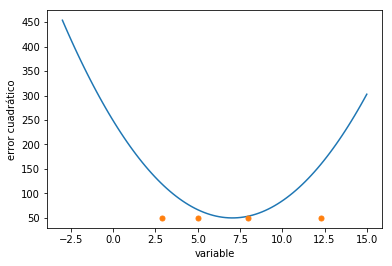

In [11]:
plt.plot(X,E);
plt.xlabel('variable'); plt.ylabel('error cuadrático');
plt.plot(misdatos,[50 for x in misdatos],'.',markerSize=10);

A ojo vemos que el mínimo cae entre 5 y 8. Vamos a imprimir el valor en ese intervalo:

In [12]:
for a in np.arange(5,8,0.1):
    print(a, error_cuad( misdatos , a))

5.0 66.7
5.1 65.1
5.2 63.58
5.3 62.14
5.4 60.78
5.5 59.5
5.6 58.3
5.7 57.18
5.8 56.14
5.9 55.18
6.0 54.3
6.1 53.5
6.2 52.78
6.3 52.14
6.4 51.58
6.5 51.1
6.6 50.7
6.7 50.38
6.8 50.14
6.9 49.98
7.0 49.9
7.1 49.9
7.2 49.98
7.3 50.14
7.4 50.38
7.5 50.7
7.6 51.1
7.7 51.58
7.8 52.14
7.9 52.78


El mínimo parece estar entre 7.0 y 7.1. Tiene sentido:

In [13]:
np.mean(misdatos)

7.0500000000000007

En [este notebook](functionQ.ipynb) hay otra explicación de este problema.

## 15)

<span style="color:darkblue">Deduce sin utilizar el ordenador el resultado que imprimirá el siguiente código:</span>

    z = 0
    for x in range(5):
        z = z+x
        while z > 0:
            z = z-1
        print(x+z)

Cuando seguimos paso a paso los valores que van tomando las variables nos damos cuenta de que, en todas la repeticiones del bucle `for`, el bucle interno `while` disminuirá de uno en uno el valor de `z` (que inicialmente coincidirá con `x`) hasta hacerlo cero. Por tanto simplemente se imprimirá el valor de `x` en cada repetición (0,1,2,3,4 en líneas sucesivas).

Vamos a comprobarlo...

In [7]:
z = 0
for x in range(5):
    z = z+x
    while z > 0:
        z = z-1
    print(x+z)

0
1
2
3
4


## 16)

<span style="color:darkblue">Define una función para determinar si una lista de enteros es decreciente. P. ej.:</span>

    decre( [50,22,37] )      --->  False
    decre( [11,8,2,-3,-10] ) --->  True
    decre( [5,4,4,1] )       --->  False

Una forma simple de resolver este problema es recorrer la lista comparando cada elemento con el siguiente. Si encontramos **un solo caso** no decreciente ya sabemos definitivamente que el resultado que tiene que producir la función es falso. Si esto no se produce **después de explorar toda la lista**, ésta será decreciente.

In [1]:
def decre(x):
    for k in range(len(x)-1):
        if x[k] <= x[k+1]:
            return False
    return True

In [8]:
decre([50,22,37]) , decre([11,8,2,-3,-10]) , decre([5,4,4,1])

(False, True, False)

El extremo superior de la secuencia de índices debe ser **uno menos** que la longitud de la lista para que en el último paso `x[k+1]` no se salga fuera. 

Un error muy común es poner `return True` en la parte `else` del `if`. Haciendo esto, basta que el primer elemento sea mayor que el segundo para que la función termine con resultado `True`, sin seguir explorando el resto de los elementos. `return True` debe ir fuera del bucle, para que se llegue ahí solo si no se ha escapado anticipadamente.

Otra posibilidad es incrementar una variable cuando se cumpla la condición y consultar su valor al final de bucle.

## 17)

<span style="color:darkblue">Define una función para determinar si una lista de enteros es el comienzo de una progresión geométrica. P. ej.:</span>

    pg( [17,8,11] )      --->  False
    pg( [5,20,80] )      --->  True
    pg( [3,15,30,60] )   --->  False

Este ejercicio es muy parecido al anterior: todos los elementos (a partir del segundo) deben cumplir una condición. Si alguno falla, podemos terminar inmediatamente con respuesta negativa. Pero hay que esperar a comprobar todos para responder positivamente.

Una forma de plantearlo es calcular con los dos primeros elementos el valor que debería tener la razón de la progresión, y comprobar en un bucle que el resto de los elementos cumplen esa misma razón.

In [1]:
# La función recibe como argumento una lista que suponemos contiene números enteros
def pg(xs):
    # Una lista vacía o con un solo elemento es (trivialmente) el principio de una progresión geométrica
    if len(xs) < 2:
        return True
    
    # Calculamos la hipotética razón.
    # No hay riesgo de salirnos de la lista
    # porque si llegamos aquí tiene al menos 2 elementos.
    # Usamos cociente de división entera para usar siempre
    # aritmética entera, exacta.
    r = xs[1] // xs[0]
    
    # Recorremos hasta el penúltimo, para que xs[k+1] no se salga
    for k in range(len(xs)-1):
        if xs[k+1] != xs[k]*r:
            return False  # Terminamos inmediatamente, no se cumple en alguno

    # Si después de probar todos llegamos aquí, tenemos éxito.
    return True

In [4]:
pg([17,8,11]),  pg([5,20,80]), pg([3,15,30,60])

(False, True, False)

La solución anterior es perfectamente válida pero podemos simplificar un poco el bucle con ayuda de la función zip. Sirve para emparejar dos contenedores y, en nuestro caso, la usaremos para emparejar la lista de entrada con ella misma sin el primer elemento, lo que permite recorrer cómodamente elementos consecutivos:

In [9]:
def pgz(xs):
    
    if len(xs) < 2:
        return True
    
    r = xs[1] // xs[0]
    
    for a, b in zip(xs,xs[1:]):
        if b != a*r:
            return False
    return True

In [10]:
pgz([17,8,11]),  pgz([5,20,80]), pgz([3,15,30,60])

(False, True, False)